<a href="https://colab.research.google.com/github/zolfaShefreie/Sentiment-Analysis-of-SnappFood-Comments/blob/main/model_using_fasttext_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


#install packages

In [2]:
!pip install parsivar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.2 MB 219 kB/s 
     |████████████████████████████████| 1.5 MB 20.9 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492972 sha256=199aed47812fbe6dd7758cf14d3f43c05cd42e6678f5e4fa17c3ae2d69568220
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449922 sha256=7cb365e82bb4513cc580d05129ad039ccdef21e2bbf4bbcc4485ad9186ac0c56
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [3]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 4.3 MB/s 
     |████████████████████████████████| 233 kB 49.0 MB/s 
     |████████████████████████████████| 1.4 MB 40.1 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=df1a360aa9bd1ddabac981109b8c5414d14e1ab68c5f41345a8a56f782c7bd46
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154171 sha256=4803a3b9c6db3f03a2ff9c9b57b9c981e605a99b68217b84c39acb5c33e3aa5d
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.4.5
    Uninstalling nltk-3.4.5:
      Successfully uninstalled nltk-3.4.5
ERROR: pip's dependenc

In [4]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 1.3 MB 9.0 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=ed727d73089d63e8e33bf493d1a413f526afa030fe0c58474e4e2f45749df044
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans


In [5]:
!pip install finglish

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 4.2 MB/s 


In [6]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=727b283ce861359b0ffbb968bcfdd1d4f640732cedc8b9a16ab2642ea84a8666
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [7]:
# !pip install -U textblob
# !python -m textblob.download_corpora

In [8]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.1 MB/s 
     |████████████████████████████████| 596 kB 59.7 MB/s 
     |████████████████████████████████| 101 kB 9.5 MB/s 
     |████████████████████████████████| 6.6 MB 46.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


#imports

In [9]:
from googletrans import Translator
import parsivar
from finglish import f2p
import hazm
import requests
import io
from textblob import Word
import os
from langdetect import detect

Loading converters...
Loading persian word list...
Loading dictionary...


In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras import Model
import keras

In [12]:
from transformers import BertTokenizer, TFBertModel

In [13]:
tf.__version__, keras.__version__

('2.8.2', '2.8.0')

#utility

In [14]:
def get_stopwords():
  url = "https://raw.githubusercontent.com/zolfaShefreie/Sentiment-Analysis-of-SnappFood-Comments/main/persian_stopword"
  content = requests.get(url).content.decode("utf-8") 
  return set([w for w in content.split('\n') if w])


In [15]:
class TextCleaner:
    punc = '''!()-[]{.};:'"\,<>/?@#$%^&*_~`|’“”…—–'''
    normalizer = parsivar.Normalizer(date_normalizing_needed=True, 
                                     statistical_space_correction=True)
    stemmer = parsivar.FindStems()
    lemmatizer = hazm.Lemmatizer()
    tokenizer = parsivar.Tokenizer()
    translator = Translator()
    stopwords = get_stopwords()

    @classmethod
    def normalize(cls, text):
        """
        convert to persian and normlize the text
        """
        if detect(text) == "en":
            text = cls.translator.translate(text, src="en", dest="fa").text
        elif detect(text) != "fa":
            text = f2p(text)
        text = cls.normalizer.normalize(text)
        return text
    
    @classmethod
    def remove_punc(cls, text):
        for each in cls.punc:
            text = text.replace(each, ' ')
        return text
    
    @classmethod
    def stem_lemmet_word(cls, word):
        """
        apply stem and lemmet on word
        """
        new_word = word.strip()
        new_word = cls.stemmer.convert_to_stem(new_word)
        if '&' in new_word:
            new_word = new_word.split('&')[0]
        new_word = cls.lemmatizer.lemmatize(new_word)
        if '#' in new_word:
            new_word = new_word.split('#')[0]
        return new_word
        

    @classmethod
    def word_cleaning(cls, text, use_stemm=True, use_lemmet=True, 
                      remove_stopword=True):
      tokens = cls.tokenizer.tokenize_words(text)
      new_text = str()
      for token in tokens:
          if use_stemm:
              token = cls.stemmer.convert_to_stem(token)
              if '&' in token:
                  token = token.split('&')[0]
          if use_lemmet:
              token = cls.lemmatizer.lemmatize(token)
              if '#' in token:
                  token = token.split('#')[0]
          if remove_stopword and token in cls.stopwords:
              continue
          new_text += " " + token
      return new_text
    
    @classmethod
    def clean_text(cls, text, use_stemm=False, use_lemmet=False, 
                   remove_stopword=False):

        text = cls.normalize(text)
        text = cls.remove_punc(text)
        text = cls.word_cleaning(text, use_stemm, use_lemmet, remove_stopword)
        text = text.replace('‌', ' ')
        text = " ".join(text.split())
        return text


In [16]:
def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

In [17]:
def get_embedding_matrix(word_index, embedding_index, embed_dim, check_word_clean=True):
    """
    create matrix besed on word_index
    """
    embedding_matrix = np.zeros((len(word_index) + 1, embed_dim))
    miss_word = set()
    for word, i in word_index.items():
        embedding_vector = embedding_index.get(word, None)
        if embedding_vector is None:
            embedding_vector = embedding_index.get(TextCleaner.stem_lemmet_word(word), None)
        if embedding_vector is not None:
            try:
                embedding_matrix[i] = np.fromiter(embedding_vector, dtype='float32')
            except:
                pass
        else:
            miss_word.add(word)
    return embedding_matrix, miss_word

#load dataset

In [18]:
train_file_path = "/content/drive/MyDrive/snappfood_comment/train.csv"
validation_file_path = "/content/drive/MyDrive/snappfood_comment/dev.csv"
need_clean_train = False
need_cleean_validation = False
if not os.path.exists(train_file_path):
    train_file_path = "/content/drive/MyDrive/DM/train.csv"
    need_clean_train = True
if not os.path.exists(validation_file_path):
    validation_file_path = "/content/drive/MyDrive/DM/dev.csv"
    need_cleean_validation = True

In [19]:
train_df = pd.read_csv(train_file_path, delimiter='\t' if need_clean_train else None , index_col=0)
validation_df = pd.read_csv(validation_file_path, delimiter='\t' if need_clean_train else None, index_col=0)

In [20]:
if need_clean_train:
    train_df['clean_comment'] = train_df['comment'].apply(TextCleaner.clean_text)
    train_df.to_csv("/content/drive/MyDrive/snappfood_comment/train.csv")

In [21]:
if need_cleean_validation:
    validation_df['clean_comment'] = validation_df['comment'].apply(TextCleaner.clean_text)
    validation_df.to_csv("/content/drive/MyDrive/snappfood_comment/dev.csv")

In [22]:
train_df

,comment,label,label_id,clean_comment
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0,قرار بود 1 ساعته برسه ولی نیم ساعت زودتر از مو...
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1,قیمت این مدل اصلا با کیفیتش سازگاری نداره ، فق...
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0,عالللی بود همه چه درست و به اندازه و کیفیت خوب...
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0,شیرینی وانیلی فقط 1 مدل بود
...,...,...,...,...
56695,یک تیکه کم فرستاده بودن و با تماس من در کمترین...,HAPPY,0,1 تیکه کم فرستاده بودن و با تماس من در کمترین ...
56696,عالی بود همه چیز ممنونم پیک هم خیلی مرتب و به ...,HAPPY,0,عالی بود همه چیز ممنونم پیک هم خیلی مرتب و به ...
56697,مثل همیشه عالی، من چندمین باره سفارش میدم و هر...,HAPPY,0,مثل همیشه عالی ، من چندمین باره سفارش میدم و ه...
56698,دلستر استوایی خواسته بودم اما لیمویی فرستادند,HAPPY,0,دلستر استوایی خواسته بودم اما لیمویی فرستادند


In [23]:
validation_df

,comment,label,label_id,clean_comment
0,همه ساندویچ‌ها سرد بود متاسفانه در صورتی که فا...,SAD,1,همه ساندویچ ها سرد بود متاسفانه در صورتی که فا...
1,تشکر، عالی‌تر از همیشه,HAPPY,0,تشکر ، عالی تر از همیشه
2,مرغ و کدو رو دوس نداشتم ولی کلا ساندویچهای خوش...,HAPPY,0,مرغ و کدو رو دوس نداشتم ولی کلا ساندویچهای خوش...
3,نمیدونم هزینه بسته بندی به چه دلیل گرفته شد؟؟؟,SAD,1,نمیدونم هزینه بسته بندی به چه دلیل گرفته شد ؟؟؟
4,یک نوشابه کم ارسال شد و تاخیر فراوان و غذای نس...,SAD,1,1 نوشابه کم ارسال شد و تاخیر فراوان و غذای نسب...
...,...,...,...,...
6295,سلام من به فاکتور غذاهایی که سفارش میدم احتیاج...,SAD,1,سلام من به فاکتور غذاهایی که سفارش میدم احتیاج...
6296,سایز پیتزا نسبت به سفارشاتی که قبلا گذشتم کم ش...,SAD,1,سایز پیتزا نسبت به سفارشاتی که قبلا گذشتم کم ش...
6297,من قارچ اضافه رو اضافه کرده بودم بودم اما اگر ...,HAPPY,0,من قارچ اضافه رو اضافه کرده بودم بودم اما اگر ...
6298,همرو بعد ۲ساعت تاخیر اشتباه آوردن پولشم رفت رو...,SAD,1,همرو بعد 2ساعت تاخیر اشتباه آوردن پولشم رفت رو...


#Model with fasttext and word2vec

##tokenizer

In [24]:
tokenizer = Tokenizer(20000)
#fit based on validation and train dataset
tokenizer.fit_on_texts(train_df.clean_comment)

In [25]:
word_index = tokenizer.word_index
len(word_index)

25399

In [26]:
train_sequences = tokenizer.texts_to_sequences(train_df.clean_comment)
validation_sequences = tokenizer.texts_to_sequences(validation_df.clean_comment)
# max_len = len(max(train_sequences + validation_sequences, key=len))
max_len = 128
train_data = pad_sequences(train_sequences, maxlen=max_len)
validation_data = pad_sequences(validation_sequences, maxlen=max_len)

##Model using fasttext

###pre-trained weights

In [27]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.fa.vec

--2022-06-25 05:12:31--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.fa.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 172.67.9.4, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1105157170 (1.0G) [binary/octet-stream]
Saving to: ‘wiki.fa.vec’

wiki.fa.vec         100%[===================>]   1.03G  6.91MB/s    in 4m 41s  

2022-06-25 05:17:13 (3.75 MB/s) - ‘wiki.fa.vec’ saved [1105157170/1105157170]



In [28]:
vector_embed_file = "/content/wiki.fa.vec"
embed_dim = 300

In [29]:
embeddings_index = load_vectors(vector_embed_file)
len(embeddings_index)

420084

In [30]:
embedding_matrix, miss_word = get_embedding_matrix(word_index, embeddings_index, embed_dim)
del embeddings_index
print(len(miss_word))

11001


In [31]:
print(miss_word)

{'کلناراضی', '2420', 'برخورادر', 'بنجل', 'دلستربود', '1کوچولو', 'همهههه', 'torshi', 'بدستتون', 'پاچیده', 'نالکس', 'ولذید', 'بندیهابهتر', 'زمینیهاشون', 'چرررررب', 'ایراده', 'عالیییییییییییییه', 'هیچیز', 'وبتی', 'بزرررگ', 'میشداز', 'مبکنید', 'مقدارس', 'هاخوب', 'مطمئنتری', 'غیرموجود', 'میبریدین', 'نمیرفتن', 'یخجال', 'وبرا', 'متاسفانهتعداد', 'نمیخورن', 'اینجودی', 'کاهووگوجه', 'هییییچ', 'تگری', 'هاشده', 'وپرسرعت', 'انسانیتون', 'بودمخصوا', '3امتیاز', 'گارمیت', 'محششششره', 'خودشونم', 'پیتزامو', '2٪', 'چیکارش', 'تاخیره', 'لوفتون', 'منطورشون', 'ناموجوده', 'لیمونادا', 'براموون', 'گریپسی', 'غذااااااااااااتون', 'عاااالیییی', 'برثدی', 'نظیررررررر', 'بددددد', 'ظهربهتر', 'کالایابرندکالابه', 'شوندباعث', 'چشامونو', '2900', 'درکتون', 'بیییییییییی', 'پاقرصش', 'مرغمو', 'واقعاااا', 'برمجموعه', 'میفرسه', 'ستری', 'افتضاححححححح', 'بودواقعا', 'سرسعم', 'سامدویچم', '1ستاره', 'ازپیک', 'سرررررررد', 'تااون', 'روسکر', '110000', 'پامپی', '1سیب', 'نیداد', 'ماسکشونو', 'چحوری', 'دندونام', 'فرقشون', 'کاغذیو', 'پدرتون', '

###get model

In [43]:

def get_model_fasttext(embedding_matrix, word_index_len, embed_dim, max_len, save_model_path):
    """
    load model if exists else create a model and return compiled model
    """
    if os.path.exists(save_model_path):
        model = tf.keras.models.load_model(save_model_path)
        return model, False
    
    else:
      input_layer = Input(shape=(max_len,), dtype='int32')
      embedding_layer = Embedding(word_index_len + 1,
                                  embed_dim,
                                  weights=[embedding_matrix],
                                  input_length=max_len,
                                  trainable=True, 
                                  mask_zero=True)
      embedded_sequences = embedding_layer(input_layer)
      x = Dropout(0.6)(embedded_sequences)
      x = Conv1D(32, 3, activation='relu')(embedded_sequences)
      x = MaxPooling1D(2)(x)
      x = Dropout(0.5)(x)
      x = LSTM(16)(x)
      x = Dropout(0.5)(x)
      preds = Dense(1, activation='sigmoid')(x)

      model = Model(input_layer, preds)
      model.compile(loss="binary_crossentropy",
                    optimizer='adam',
                    metrics=['accuracy'])
      return model, True

In [44]:
save_model_path = "/content/drive/MyDrive/snappfood_comment/fasttext_model.h5"
model, need_train = get_model_fasttext(embedding_matrix, len(word_index), embed_dim, max_len, save_model_path)

In [45]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 128, 300)          7620000   
                                                                 
 conv1d_3 (Conv1D)           (None, 126, 32)           28832     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 63, 32)           0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 63, 32)            0         
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                           

###train model

In [46]:
if need_train:
    history = model.fit(train_data, train_df.label_id, epochs=50, 
                        validation_data=(validation_data, validation_df.label_id),
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=1)])
    model.save(save_model_path)

Epoch 1/50
1772/1772 [==============================] - 257s 144ms/step - loss: 0.4005 - accuracy: 0.8317 - val_loss: 0.3391 - val_accuracy: 0.8594
Epoch 2/50
1772/1772 [==============================] - 255s 144ms/step - loss: 0.3313 - accuracy: 0.8683 - val_loss: 0.3324 - val_accuracy: 0.8587
Epoch 3/50
1772/1772 [==============================] - 252s 142ms/step - loss: 0.2998 - accuracy: 0.8821 - val_loss: 0.3429 - val_accuracy: 0.8581


####train plot

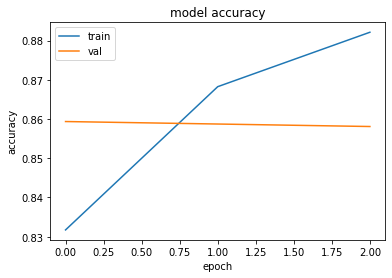

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

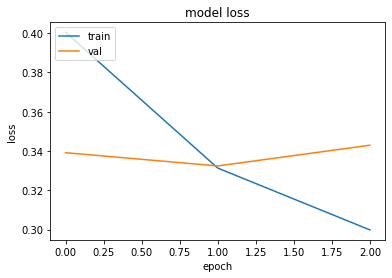

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###evaluate model

In [49]:
test_path = "/content/drive/MyDrive/DM/dev.csv"

In [50]:
test_df = pd.read_csv(test_path, delimiter='\t' , index_col=0)
test_df['clean_comment'] = test_df['comment'].apply(TextCleaner.clean_text)
test_sequences = tokenizer.texts_to_sequences(test_df.clean_comment)
test_data = pad_sequences(test_sequences, maxlen=max_len)

error
error


In [51]:
y_pred = model.predict(test_data)

In [52]:
y_pred.shape

(6300, 1)

In [53]:
y_pred = np.array(y_pred > 0.5).astype("int32")

In [54]:
print(classification_report(test_df.label_id, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      3150
           1       0.82      0.91      0.87      3150

    accuracy                           0.86      6300
   macro avg       0.86      0.86      0.86      6300
weighted avg       0.86      0.86      0.86      6300



In [55]:
print("precision_score", precision_score(test_df.label_id, y_pred , average="macro"))
print("recall_score", recall_score(test_df.label_id, y_pred , average="macro"))
print("f1_score", f1_score(test_df.label_id, y_pred , average="macro"))

precision_score 0.8626756423070139
recall_score 0.858095238095238
f1_score 0.8576457731849949


##Model using word2vec

###pre-trained embed weights

In [56]:
!wget http://vectors.nlpl.eu/repository/20/61.zip

--2022-06-25 05:43:51--  http://vectors.nlpl.eu/repository/20/61.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 730416332 (697M) [application/zip]
Saving to: ‘61.zip’

61.zip              100%[===================>] 696.58M  10.2MB/s    in 70s     

2022-06-25 05:45:03 (9.91 MB/s) - ‘61.zip’ saved [730416332/730416332]



In [57]:
!unzip /content/61.zip

Archive:  /content/61.zip
  inflating: LIST                    
  inflating: meta.json               
  inflating: model.bin               
  inflating: model.txt               
  inflating: README                  


In [58]:
vector_embed_file = "/content/model.txt"
embed_dim = 100

In [59]:
embeddings_index = load_vectors(vector_embed_file)
len(embeddings_index)

966446

In [60]:
embedding_matrix, miss_word = get_embedding_matrix(word_index, embeddings_index, embed_dim)
del embeddings_index
print(len(miss_word))

5592


In [61]:
print(miss_word)

{'کلناراضی', 'برخورادر', '1کوچولو', 'دلستربود', 'torshi', 'نالکس', 'ولذید', 'بندیهابهتر', 'زمینیهاشون', 'چرررررب', 'بزرررگ', 'مبکنید', 'مقدارس', 'مطمئنتری', 'میبریدین', 'متاسفانهتعداد', 'اینجودی', 'کاهووگوجه', 'انسانیتون', 'بودمخصوا', 'گارمیت', 'محششششره', 'پیتزامو', '2٪', 'لوفتون', 'ناموجوده', 'لیمونادا', 'براموون', 'گریپسی', 'غذااااااااااااتون', 'عاااالیییی', 'برثدی', 'نظیررررررر', 'بددددد', 'ظهربهتر', 'کالایابرندکالابه', 'شوندباعث', 'بیییییییییی', 'پاقرصش', 'میفرسه', 'سرسعم', 'افتضاححححححح', 'سامدویچم', 'ازپیک', 'سرررررررد', 'روسکر', '1سیب', 'نیداد', 'ماسکشونو', 'دوغذا', 'بدترینننننن', 'سالاداصلا', 'فروشندش', 'بارسفارش', 'y0m2d2', 'مالیاتتو', 'درستهدمتون', 'غیردبهداشتی', 'شفتهئ', 'خمیشه', 'دونرکبابهای', 'سردویخ', 'بامقدارکم', 'پیراشمی', 'شکموا', 'مخافاتش', 'مخلفاتو', 'طبخشه', 'سالادسزار', 'خریدهامو', 'کراکفش', 'فسنجونای', 'اندومی', 'مخری', 'مارگاریتاش', 'ودمشون', 'عااااالللللی', 'دوساندویچ', 'اندازهآن', 'چندباریم', 'قنادیتون', 'پیتزامثل', 'پرپیاز', 'فکذ', 'سفارشاتتون', 'هرگزززززز', 

###get model

In [62]:

def get_model_word2vec(embedding_matrix, word_index_len, embed_dim, max_len, save_model_path):
    """
    load model if exists else create a model and return compiled model
    """
    if os.path.exists(save_model_path):
        model = tf.keras.models.load_model(save_model_path)
        return model, False
    
    else:
      input_layer = Input(shape=(max_len,), dtype='int32')
      embedding_layer = Embedding(word_index_len + 1,
                                  embed_dim,
                                  weights=[embedding_matrix],
                                  input_length=max_len,
                                  trainable=True, 
                                  mask_zero=True)
      embedded_sequences = embedding_layer(input_layer)
      x = Dropout(0.5)(embedded_sequences)
      x = Conv1D(32, 3, activation='relu')(x)
      x = MaxPooling1D(2)(x)
      x = Dropout(0.5)(x)
      x = LSTM(8)(x)
      x = Dropout(0.5)(x)
      preds = Dense(1, activation='sigmoid')(x)

      model = Model(input_layer, preds)
      model.compile(loss="binary_crossentropy",
                    optimizer='adam',
                    metrics=['accuracy'])
      return model, True

In [63]:
save_model_path = "/content/drive/MyDrive/snappfood_comment/word2vec_model.h5"
model, need_train = get_model_word2vec(embedding_matrix, len(word_index), embed_dim, max_len, save_model_path)

In [64]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 128, 100)          2540000   
                                                                 
 dropout_12 (Dropout)        (None, 128, 100)          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 126, 32)           9632      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 63, 32)           0         
 1D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 63, 32)            0         
                                                           

###train model

In [65]:
if need_train:
    history = model.fit(train_data, train_df.label_id, epochs=50, 
                        validation_data=(validation_data, validation_df.label_id), 
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=1)])
    model.save(save_model_path)

Epoch 1/50
1772/1772 [==============================] - 137s 76ms/step - loss: 0.4654 - accuracy: 0.7935 - val_loss: 0.3555 - val_accuracy: 0.8546
Epoch 2/50
1772/1772 [==============================] - 134s 76ms/step - loss: 0.3849 - accuracy: 0.8463 - val_loss: 0.3378 - val_accuracy: 0.8632
Epoch 3/50
1772/1772 [==============================] - 134s 76ms/step - loss: 0.3623 - accuracy: 0.8544 - val_loss: 0.3308 - val_accuracy: 0.8644
Epoch 4/50
1772/1772 [==============================] - 132s 75ms/step - loss: 0.3477 - accuracy: 0.8633 - val_loss: 0.3245 - val_accuracy: 0.8660
Epoch 5/50
1772/1772 [==============================] - 143s 81ms/step - loss: 0.3365 - accuracy: 0.8677 - val_loss: 0.3273 - val_accuracy: 0.8573


####plot history of train

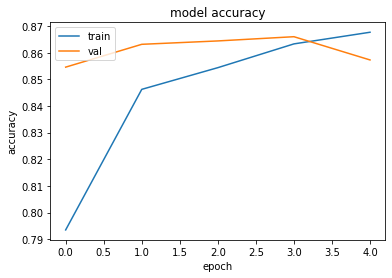

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

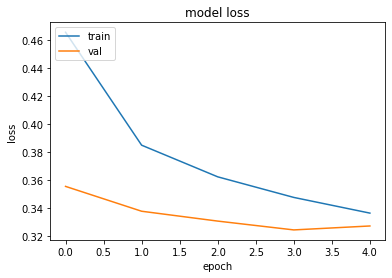

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###evaluate model

In [68]:
test_path = "/content/drive/MyDrive/DM/dev.csv"

In [75]:
test_df = pd.read_csv(test_path, delimiter='\t' , index_col=0)
test_df['clean_comment'] = test_df['comment'].apply(TextCleaner.clean_text)
test_sequences = tokenizer.texts_to_sequences(test_df.clean_comment)
test_data = pad_sequences(test_sequences, maxlen=max_len)

error
error


In [76]:
y_pred = model.predict(test_data)

In [77]:
y_pred = np.array(y_pred > 0.5).astype("int32")

In [78]:
print(classification_report(test_df.label_id, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      3150
           1       0.85      0.87      0.86      3150

    accuracy                           0.86      6300
   macro avg       0.86      0.86      0.86      6300
weighted avg       0.86      0.86      0.86      6300



In [79]:
print("precision_score", precision_score(test_df.label_id, y_pred , average="macro"))
print("recall_score", recall_score(test_df.label_id, y_pred , average="macro"))
print("f1_score", f1_score(test_df.label_id, y_pred , average="macro"))

precision_score 0.8575870442910385
recall_score 0.8573015873015872
f1_score 0.8572731030549079
